In [1]:
from matplotlib import pyplot as plt
from chromadb.utils.data_loaders import ImageLoader
from chromadb.utils.embedding_functions.open_clip_embedding_function import OpenCLIPEmbeddingFunction

from utils import get_client, get_or_create_collection

In [ ]:
client = get_client(client_type='persistent', path='../dbs')
data_loader = ImageLoader()
embedding_function = OpenCLIPEmbeddingFunction()
collection = get_or_create_collection(
  client=client,
  name='my_collection',
  embedding_function=embedding_function,
  data_loader=data_loader)

In [ ]:
collection.add(
  ids=['0', '1'],
  uris=['../data/lion.jpg', '../data/tiger.jpg'],
  metadatas=[{'image_category': 'animals'}, {'image_category': 'animals'}]
)

In [13]:
def print_query_results(query_list, query_results):
  result_count = len(query_results['ids'][0])

  for i in range(len(query_list)):
    print(f'Results for query: {query_list[i]}')

    for j in range(result_count):
      id       = query_results["ids"][i][j]
      distance = query_results['distances'][i][j]
      data     = query_results['data'][i][j]
      document = query_results['documents'][i][j]
      metadata = query_results['metadatas'][i][j]
      uri      = query_results['uris'][i][j]
      print(f'id: {id}, distance: {distance}, metadata: {metadata}, document: {document}') 
      print(f'data: {uri}')
      plt.imshow(data)
      plt.axis("off")
      plt.show()

Results for query: lion
id: 0, distance: 1.3801450363582146, metadata: {'image_category': 'animals'}, document: None
data: ../data/lion.jpg


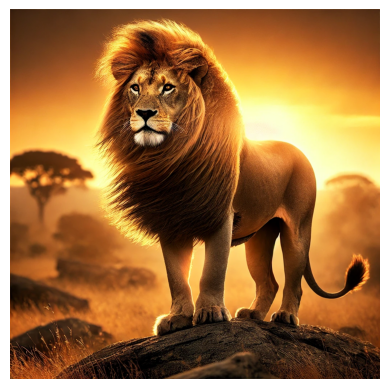

id: 1, distance: 1.560302463808989, metadata: {'image_category': 'animals'}, document: None
data: ../data/tiger.jpg


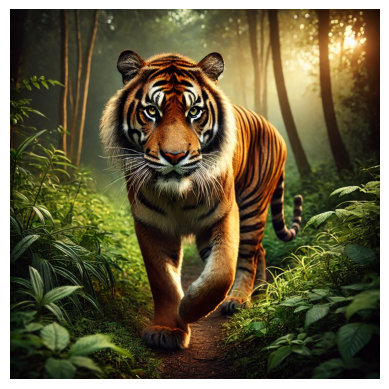

In [15]:
query_texts = ['lion']
query_results = collection.query(
  query_texts=query_texts,
  n_results=2,
  include=['documents', 'distances', 'metadatas', 'data', 'uris'],
  where={'image_category': 'animals'}
)

print_query_results(query_texts, query_results)

In [ ]:
ids=[
  'A01-01',
  'A01-02',
  'A02-01'
]

uris=[
  f'../data/{ids[0]}.jpg',
  f'../data/{ids[1]}.jpg',
  f'../data/{ids[2]}.jpg'
]

metadatas=[
  {'item_id': ids[0], 'image_category':'food', 'item_name': 'Bean Dish'},
  {'item_id': ids[1], 'image_category':'food', 'item_name': 'Broccoli Dish'},
  {'item_id': ids[2], 'image_category':'food', 'item_name': 'Meat Dish'}
]

collection.add(ids=ids, uris=uris, metadatas=metadatas)

Results for query: broccoli
id: A01-02, distance: 1.4101807895583212, metadata: {'image_category': 'food', 'item_id': 'A01-02', 'item_name': 'Broccoli Dish'}, document: None
data: ../data/A01-02.jpg


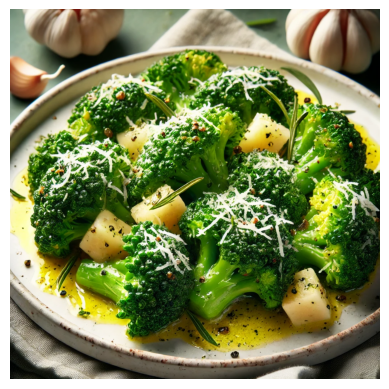

id: A01-01, distance: 1.6647007719771332, metadata: {'image_category': 'food', 'item_id': 'A01-01', 'item_name': 'Bean Dish'}, document: None
data: ../data/A01-01.jpg


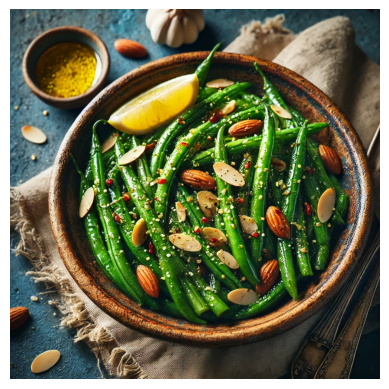

id: A02-01, distance: 1.8092315411741022, metadata: {'image_category': 'food', 'item_id': 'A02-01', 'item_name': 'Meat Dish'}, document: None
data: ../data/A02-01.jpg


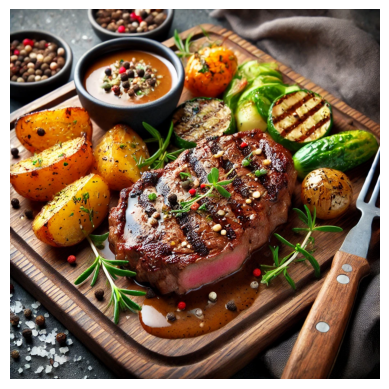

In [23]:
query_texts = ['broccoli']
query_results = collection.query(
  query_texts=query_texts,
  n_results=3,
  include=['documents', 'distances', 'metadatas', 'data', 'uris'],
  where={'image_category': {'$ne':'animal'}}
)

print_query_results(query_texts, query_results)